In [ ]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CAX_Train1'

In [ ]:
PH_data_five = pd.DataFrame()

In [ ]:
files = [f for f in listdir(file_path) if isfile(join(file_path, f))]
for idy, file_iter in enumerate(files):
    print ("File no " + str(idy) + " of "+ str(len(files)))
    data = pd.read_csv('/content/drive/MyDrive/CAX_Train1/'+ file_iter)
    PH_five = data['PH'] == 5
    PH_data_five = PH_data_five.append(data[PH_five])

File no 0 of 200
File no 1 of 200
File no 2 of 200
File no 3 of 200
File no 4 of 200
File no 5 of 200
File no 6 of 200
File no 7 of 200
File no 8 of 200
File no 9 of 200
File no 10 of 200
File no 11 of 200
File no 12 of 200
File no 13 of 200
File no 14 of 200
File no 15 of 200
File no 16 of 200
File no 17 of 200
File no 18 of 200
File no 19 of 200
File no 20 of 200
File no 21 of 200
File no 22 of 200
File no 23 of 200
File no 24 of 200
File no 25 of 200
File no 26 of 200
File no 27 of 200
File no 28 of 200
File no 29 of 200
File no 30 of 200
File no 31 of 200
File no 32 of 200
File no 33 of 200
File no 34 of 200
File no 35 of 200
File no 36 of 200
File no 37 of 200
File no 38 of 200
File no 39 of 200
File no 40 of 200
File no 41 of 200
File no 42 of 200
File no 43 of 200
File no 44 of 200
File no 45 of 200
File no 46 of 200
File no 47 of 200
File no 48 of 200
File no 49 of 200
File no 50 of 200
File no 51 of 200
File no 52 of 200
File no 53 of 200
File no 54 of 200
File no 55 of 200
Fi

In [ ]:
PH_data_five.to_pickle('PH_data_five.df')

In [ ]:

import pandas as pd
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

import pickle
import itertools

In [ ]:
pickle_file = open("PH_data_five.df", "rb")

In [ ]:
training_data = pd.read_pickle('PH_data_five.df')

In [ ]:
training_data

,ACID,Flight_instance_ID,Year,Month,Day,Hour,Minute,Second,ABRK,ELEV_1,...,BPGR_2,BPYR_1,BPYR_2,CALT,CASS,CRSS,DFGS,DWPT,EAI,FF
1930,676,676200405111519,2004,5,11,15,50,28,119.983559,-14.097580,...,24.414124,48.828247,0.0,0,278.0,23.993969,1,4620,0,5912
1931,676,676200405111519,2004,5,11,15,50,29,119.983559,-13.504297,...,24.414124,43.945423,0.0,0,278.0,23.993969,1,4616,0,5916
1932,676,676200405111519,2004,5,11,15,50,30,119.983559,-4.605068,...,24.414124,43.945423,0.0,0,278.0,23.993969,1,4612,0,5904
1933,676,676200405111519,2004,5,11,15,50,31,119.983559,-4.645985,...,24.414124,48.828247,0.0,0,278.0,23.993969,1,484,0,5896
1934,676,676200405111519,2004,5,11,15,50,32,119.983559,-7.428272,...,29.296949,48.828247,0.0,0,278.0,23.993969,1,480,0,5896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,676,676201003140736,2002,3,14,8,27,1,119.895676,-8.921707,...,39.062599,58.593899,0.0,0,250.0,61.962448,1,27996,15,2126
3092,676,676201003140736,2002,3,14,8,27,2,119.895676,-2.600185,...,43.945423,53.711075,0.0,0,250.0,61.962448,1,27992,15,1796
3093,676,676201003140736,2002,3,14,8,27,3,119.895676,-2.477436,...,39.062599,53.711075,0.0,0,250.0,61.962448,1,27988,15,1676
3094,676,676201003140736,2002,3,14,8,27,4,119.881027,-2.559269,...,39.062599,58.593899,0.0,0,250.0,61.962448,1,27984,15,1650


In [ ]:
feature_columns = [col for col in training_data.columns if not (col=='FF' or col=='Flight_instance_ID' or  col=='ACID')]

y = training_data['FF'].values
X = training_data[feature_columns].values

In [ ]:
X = StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = VarianceThreshold(threshold=0.0).fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# **Random Forest**

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_five_rf_gen_five.model", "wb" )) 


In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['MRK' 'TRK_Mean' 'OIPL' 'OIT_1' 'CCPF_Mean' 'CCPF_Min' 'GPWS' 'CCPC_Max'
 'Year' 'AOAI_Mean' 'AOAC_Max' 'OIT_4' 'N1CO' 'FADS' 'FADF' 'TH_Max'
 'TRK_Min' 'TRKM_Mean' 'ABRK' 'FIRE_1' 'SMOK' 'APUF_Mean' 'LONP'
 'APUF_Min' 'SMKB' 'FQTY_2' 'WAI_2' 'FIRE_3' 'SNAP' 'MH_Max' 'ALT_Mean'
 'RUDP_Min' 'FIRE_4' 'SPLG' 'TMODE' 'BAL1_Min' 'BAL2_Mean' 'SPL_1'
 'TOCW_Max' 'TH_Mean' 'MACH_Max' 'ALT_Min' 'MH_Min' 'AOA1_Max' 'FQTY_3'
 'HYDY' 'AOA2_Min' 'LATG_Mean' 'MACH_Min' 'CAS_Max' 'PSA_Min' 'CWPF_Min'
 'PT_Min' 'CWPF_Mean' 'BAL2_Max' 'BAL1_Max' 'Second' 'LONG_Max'
 'MACH_Mean' 'GS_Max' 'LONG_Min' 'ELEV_2' 'Month' 'CAS_Min' 'ALTR_Max'
 'TRKM_Max' 'CAS_Mean' 'TAS_Max' 'AOA2_Mean' 'CASM_Mean' 'DA_Mean'
 'PS_Min' 'BAL2_Min' 'HYDG' 'PI_Mean' 'PUSH' 'CCPC_Mean' 'N1T_Mean'
 'PSA_Mean' 'VHF3' 'AOA1_Mean' 'PS_Max' 'SPLY' 'PTRM' 'TOCW_Min'
 'RUDP_Mean' 'VHF2' 'LATG_Max' 'RUDD_Max' 'LOC' 'PACK' 'CWPC_Mean'
 'TAS_Min' 'APUF_Max' 'CWPC_Max' 'TCAS' 'TH_Min' 'PT_Mean' 'HF2' 'ELEV_1'
 'TMAG' 'HF1' 'LMOD' 'SHKR_Min' 

In [ ]:
print(np.argsort(rfr.feature_importances_))

[ 35 173  38  39  74  75  23  73   0 128 127  42  37  11  10 172 174 176
   6  13  50  68  33  69  49  19  67  15  51 160 113 105  16  52  60 132
 134  54 112 170 157 114 159 121  20  28 123 149 156 139  96  81  99  80
 136 133   5 154 155 148 153   8   1 138 118 178 137 169 122 140 143  93
 135  27  89  47  71 161  95  63 119  94  53  46 111 104  62 151 103  32
  43  77 168  70  79  58 171  98  26   7  59  25  31 108 107 130 146 175
  97  44  90   4   9  61 158 106 152 129  24 131  40   3 120  48  76 147
 110 150 145  92 144  36  84  72 141 167  45  12  41 142  83 179  78 109
  91  86 166  82 165 163  88  18  85   2  57  55  87  34  14 100  22  29
 101  30  56 102  21  17  66 180 125  64 162 115  65 116 164 124 126 117
 177]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 51.75155827625628


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.9933069193610142


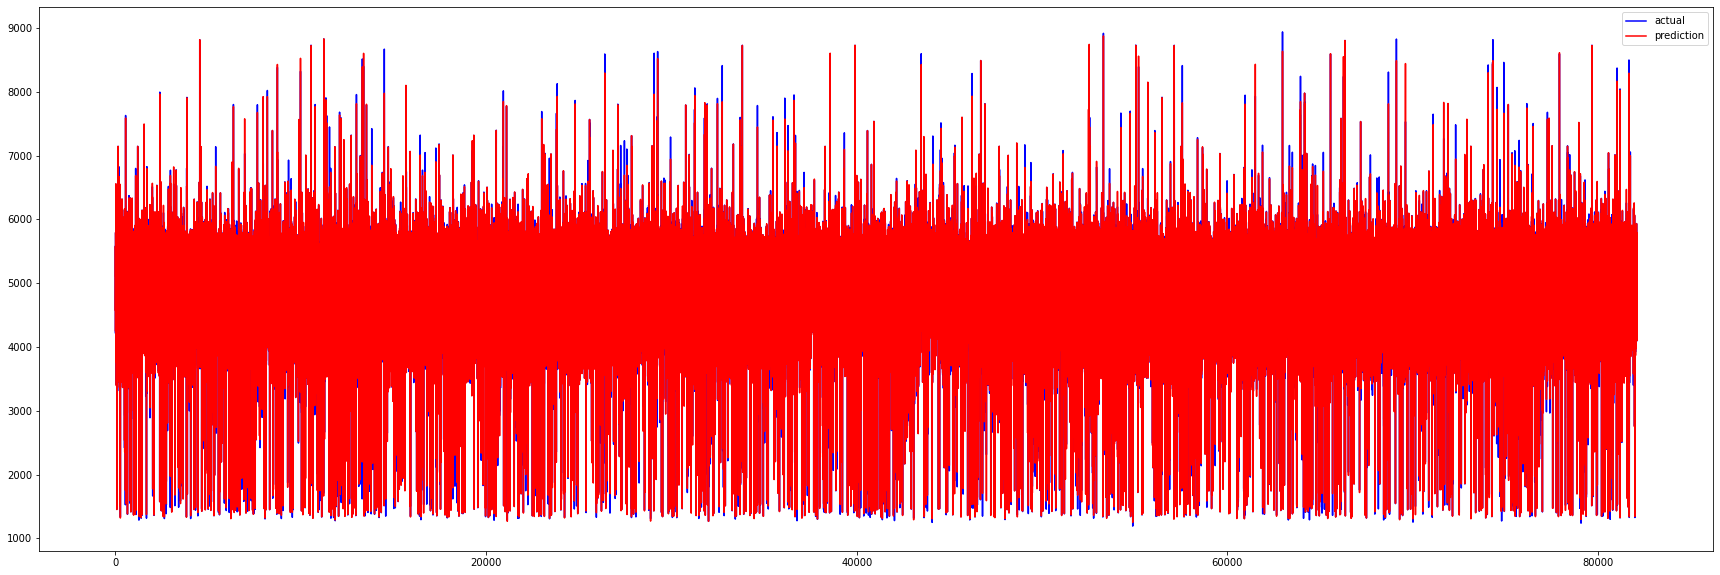

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()


# **GRADIENT BOOSTING REGRESSOR**

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rfr = GradientBoostingRegressor(n_estimators=10, random_state= 0 )

In [ ]:
rfr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=10, random_state=0)

In [ ]:
pickle.dump( rfr, open( "ph_five_rf_gen_five.model", "wb" )) 


In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['Year' 'TOCW_Mean' 'TOCW_Min' 'TOCW_Max' 'ALT_Mean' 'ALT_Min' 'ALT_Max'
 'ALTR_Mean' 'ALTR_Max' 'AOA1_Mean' 'AOA1_Min' 'AOA1_Max' 'AOA2_Mean'
 'AOA2_Min' 'AOAC_Max' 'AOAI_Mean' 'AOAI_Min' 'AOAI_Max' 'SHKR_Max'
 'SHKR_Min' 'SHKR_Mean' 'RUDP_Max' 'MSQT_2_Max' 'PI_Mean' 'VIB_1_Mean'
 'PI_Max' 'PS_Mean' 'PS_Min' 'PS_Max' 'PSA_Mean' 'BAL1_Mean' 'PSA_Min'
 'PT_Mean' 'PT_Min' 'PT_Max' 'RUDD_Mean' 'RUDD_Min' 'RUDD_Max' 'RUDP_Mean'
 'RUDP_Min' 'PSA_Max' 'MSQT_2_Min' 'BAL1_Min' 'BAL2_Mean' 'MH_Mean'
 'MH_Min' 'MH_Max' 'N1T_Mean' 'NSQT_Min' 'NSQT_Max' 'TAS_Mean' 'TAS_Min'
 'TAS_Max' 'TH_Mean' 'TH_Min' 'TH_Max' 'TRK_Mean' 'TRK_Min' 'TRK_Max'
 'TRKM_Mean' 'TRKM_Max' 'MACH_Max' 'MACH_Min' 'MACH_Mean' 'LONG_Max'
 'BAL2_Min' 'BAL2_Max' 'CAS_Mean' 'CAS_Min' 'CAS_Max' 'CASM_Mean'
 'CASM_Max' 'DA_Mean' 'BAL1_Max' 'DA_Min' 'GS_Mean' 'GS_Min' 'GS_Max'
 'LATG_Mean' 'LATG_Min' 'LATG_Max' 'LONG_Mean' 'LONG_Min' 'DA_Max'
 'MSQT_2_Mean' 'PI_Min' 'MSQT_1_Min' 'HF1' 'HF2' 'HYDG' 'HYDY' 'ILSF'
 'LATP' 'LMOD' 'LOC

In [ ]:
print(np.argsort(rfr.feature_importances_))

[  0 110 111 112 113 114 115 116 118 119 120 121 122 123 127 128 129 130
 109 108 107 106  88  89 179  91  92  93  94  95 131  96  98  99 100 101
 102 103 104 105  97  87 132 134 158 159 160 161 165 166 167 168 169 170
 171 172 173 174 175 176 178 157 156 155 154 135 136 137 138 139 140 142
 143 133 144 146 147 148 149 150 151 152 153 145  86  90  84  25  26  27
  28  29  30  31  32  24  33  35  36  37  38  39  40  85  42  34  23  21
  20   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  43  44  41  46  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  45  63  64  62  47  48  49  50  51  52  54
  53  58  61  60  59  57  56 180  55  22 141 163 125 124 164 162 126 117
 177]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 353.2220589853846


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.6882009192054752


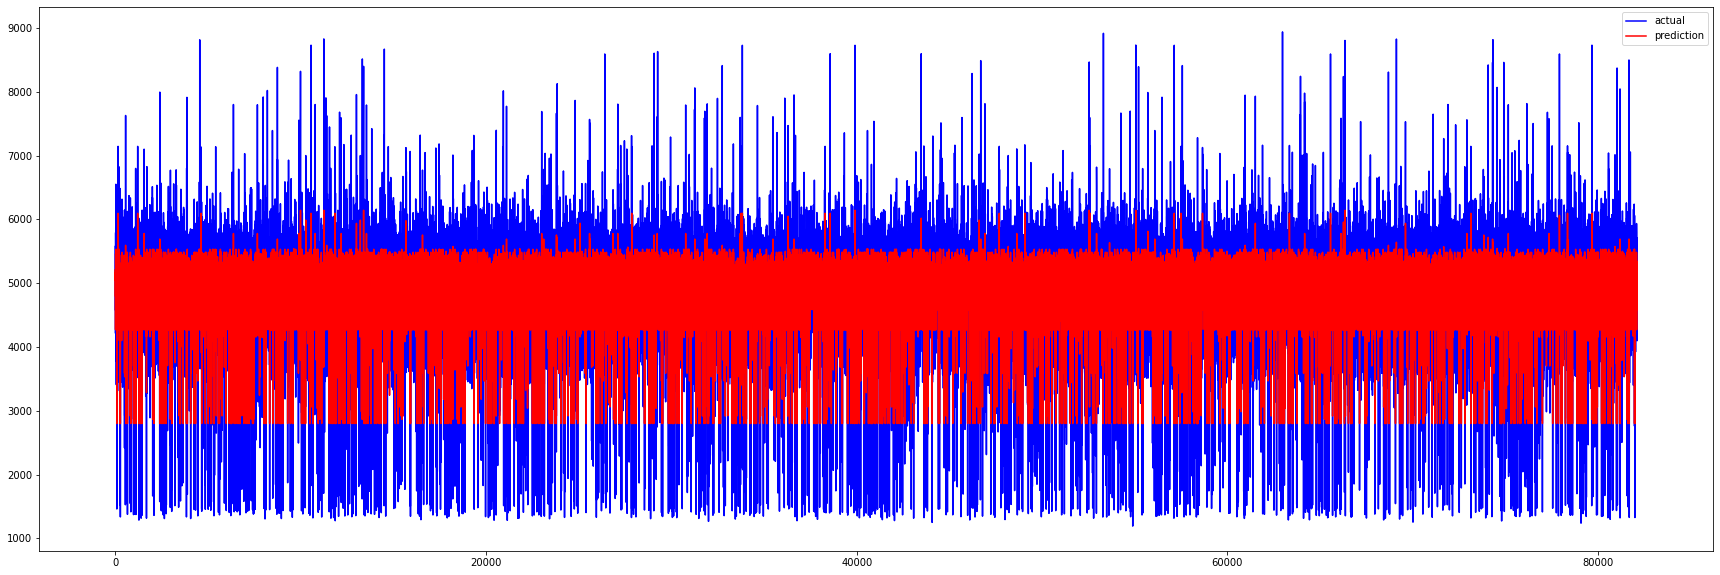

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **K NEAREST NEIGHBOURS**

In [ ]:
from sklearn import neighbors

In [ ]:
rfr = neighbors.KNeighborsRegressor(n_neighbors =20 )

In [ ]:
rfr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:

y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_five_rf_gen_five.model", "wb" )) 

In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 156.84177310646896


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.9385244133605707


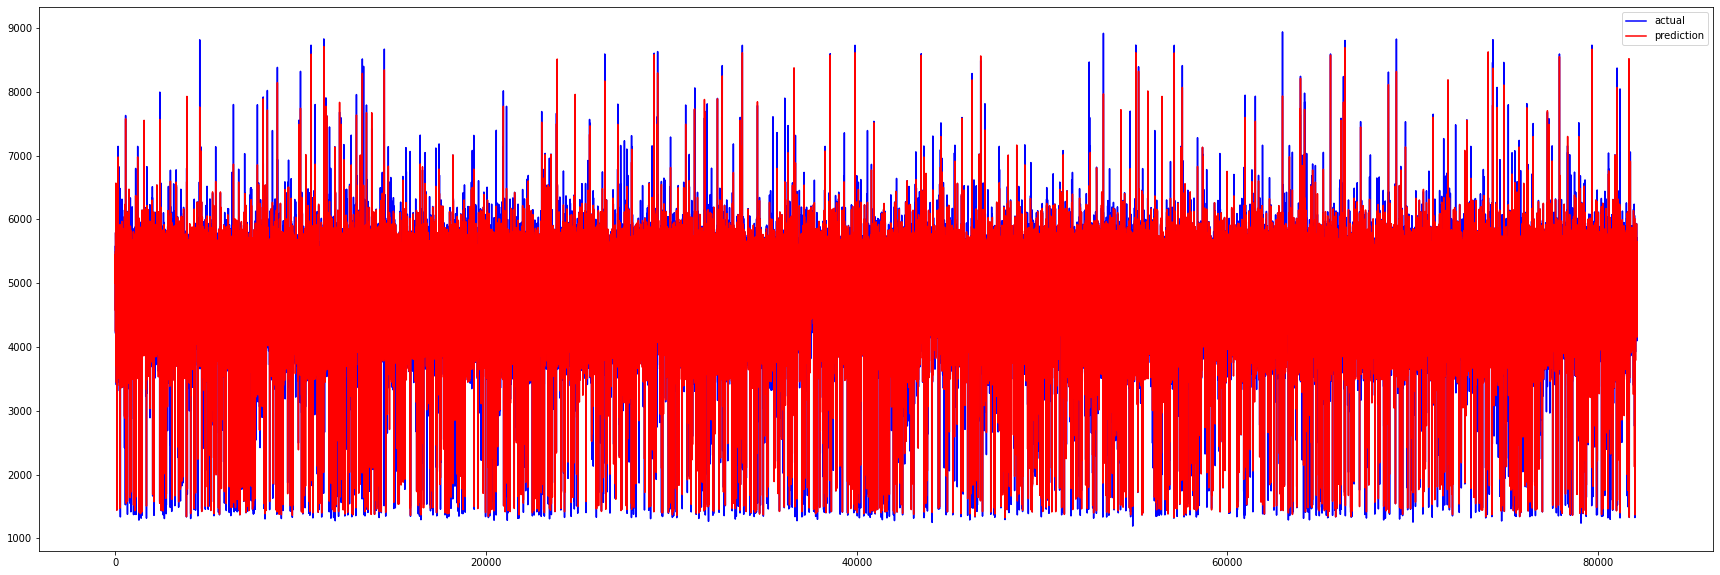

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu',input_shape=(181,)))
                                                                                         
                                                                                         
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
regressor.add(Dense( 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = RMSprop(0.001), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])


In [ ]:
regressor.fit(X_train,y_train,epochs=25)

Epoch 1/25
5988/5988 [==============================] - 25s 4ms/step - loss: 239.7990 - mean_absolute_error: 239.7990
Epoch 2/25
5988/5988 [==============================] - 34s 6ms/step - loss: 138.2929 - mean_absolute_error: 138.2929
Epoch 3/25
5988/5988 [==============================] - 29s 5ms/step - loss: 126.2237 - mean_absolute_error: 126.2237
Epoch 4/25
5988/5988 [==============================] - 26s 4ms/step - loss: 117.8200 - mean_absolute_error: 117.8200
Epoch 5/25
5988/5988 [==============================] - 21s 3ms/step - loss: 112.0872 - mean_absolute_error: 112.0872
Epoch 6/25
5988/5988 [==============================] - 20s 3ms/step - loss: 108.0643 - mean_absolute_error: 108.0643
Epoch 7/25
5988/5988 [==============================] - 22s 4ms/step - loss: 104.8853 - mean_absolute_error: 104.8853
Epoch 8/25
5988/5988 [==============================] - 14s 2ms/step - loss: 101.3295 - mean_absolute_error: 101.3295
Epoch 9/25
5988/5988 [==============================] - 

In [ ]:
y_pred= regressor.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.98061079651221
MSE: 7726.868917961319
RMSE: 87.90261041608105
MAE: 67.02703547708536


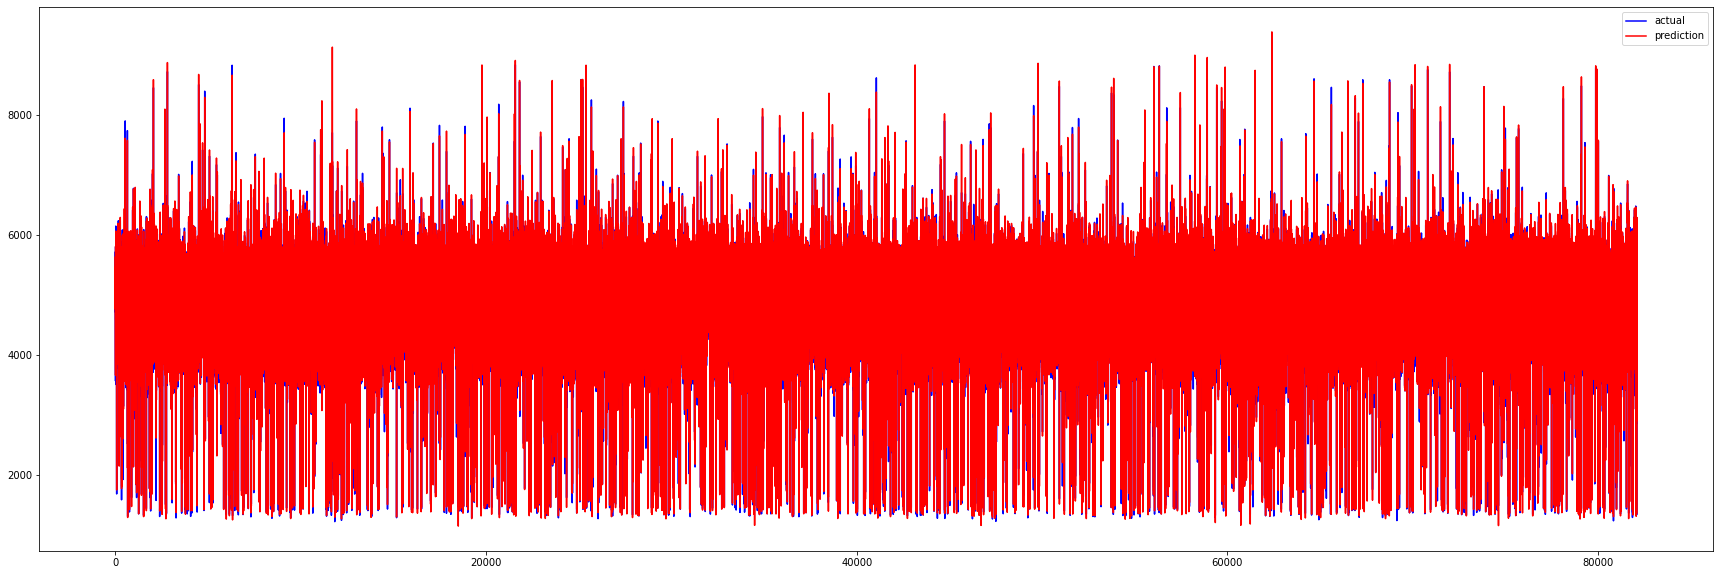

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**CNN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(181,1)))
model.add(Flatten())


In [ ]:
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 180, 32)           96        
                                                                 
 flatten (Flatten)           (None, 5760)              0         
                                                                 
 dense (Dense)               (None, 64)                368704    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 368,865
Trainable params: 368,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=12,epochs=50, verbose=0)


In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.9925800420282045
MSE: 2956.9570849545507
RMSE: 54.3779098987314
MAE: 35.61167092199563


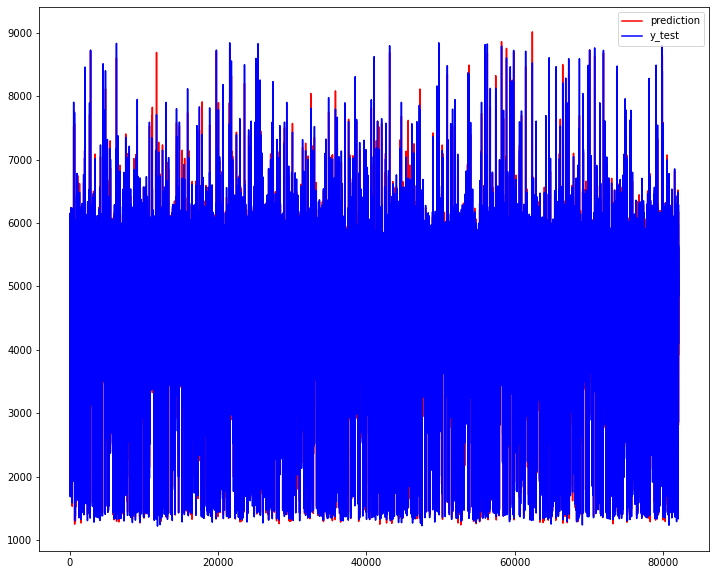

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12,10))
plt.plot(y_pred,c='red',label='prediction')
plt.plot(y_val,c='blue',label='y_test')
plt.legend()
plt.show()